## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.info()
# В наборе нет пропусков и категориальных признаков (определил по Dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [4]:
# Функция для работы с выбросами
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import itertools
def bxplt_knn(array, labels=['alcohol', 'magnesium']):
    fig, axes = plt.subplots(ncols=2, nrows=round(len(labels)/2), figsize=(8, 12))
    if round(len(labels)/2) == 1:
        for i in range(len(labels)):
            sns.boxplot(data=array[:, i], ax=axes[i])
            axes[i].set_title(labels[i])
    else:
        for i, ax in zip(range(len(labels)),
                               itertools.product(range(2), range(round(len(labels)/2)))):
            sns.boxplot(data=array[:, i], ax=axes[ax[1], ax[0]])
            axes[ax[1], ax[0]].set_title(labels[i])

In [5]:
# stdsc = StandardScaler()
# X_outlies = stdsc.fit_transform(X[['alcohol', 'magnesium']])
# bxplt_knn(X_outlies)
# plt.show()
# print('After deleting outlies')
# bxplt_knn(X_outlies[X_outlies[:, 1] < 2.5])
# # После применения масштабирования, видно, что признак magnesium 
# # содержит 4 выброса (значения больше 2.5) - удалим их
# X = X[X_outlies[:, 1] < 2.5]
# y = y[X_outlies[:, 1] < 2.5]

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
params = [1, 3, 5, 10, 15, 25]
stdsc = StandardScaler()
X_train_knn = stdsc.fit_transform(X_train[['alcohol', 'magnesium']])
X_test_knn = stdsc.transform(X_test[['alcohol', 'magnesium']])
clfs = []
labels = []
ans = {"NN":[], "Train": [], "Test": []}
for k in params:
    clf = KNeighborsClassifier(n_neighbors=k)
    labels.append(f'n_neighbors={k}')
    clf.fit(X_train_knn, y_train)
    clfs.append(clf)
    y_train_pred = clf.predict(X_train_knn)
    y_test_pred = clf.predict(X_test_knn)
    ans["NN"].append(k)
    ans["Train"].append(round(accuracy_score(y_train, y_train_pred), 2))
    ans["Test"].append(round(accuracy_score(y_test, y_test_pred), 2))
pd.DataFrame(ans).set_index("NN")

,Train,Test
NN,,
1,1.00,0.63
3,0.82,0.74
5,0.81,0.74
10,0.76,0.72
15,0.74,0.67
25,0.74,0.67


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [8]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [9]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

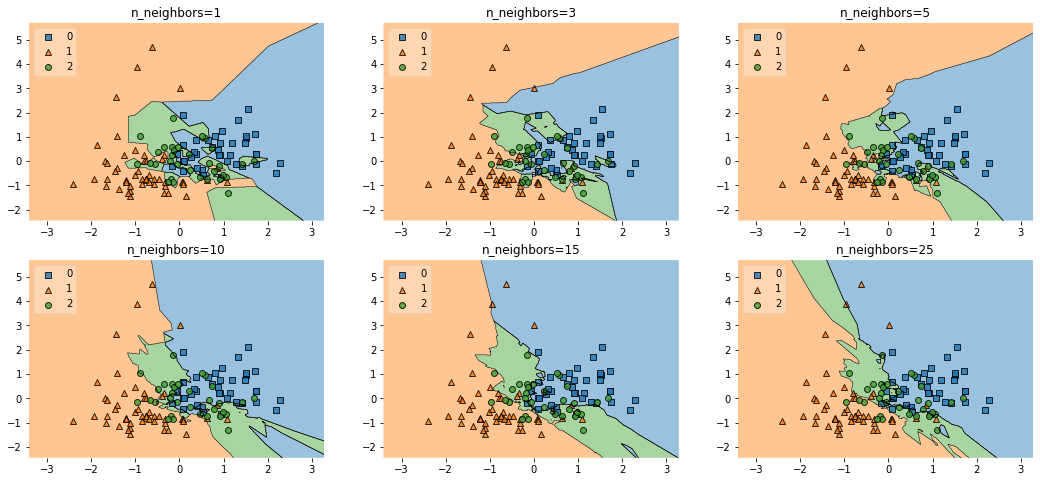

In [10]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(18, 8))
for clf, lab, grd in zip(clfs,
                         labels,
                         itertools.product(range(2), range(3))):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_knn, y=y_train, clf=clf, legend=2)
    plt.title(lab)
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [11]:
# В задаче 1.3 результат сильно зависит от random_seed, несмотря на удаление выбросов, возможно из-за плотного
# размещения точек, поэтому не стоит подбирать гиперпараметр основываясь только на данных об accuracy. (Отметим,
# что наилучший результат при сиде 17 обеспечивается для 3 соседей).
# Задача 1.5 помогает подтвердить плотное расположение точек, и показывает, что модель при гиперпараметре 3 является
# не лучшей, так как строит слишком сложные решающие поверхности, из-за чего могут возникать ошибки для новых
# данных, поэтому оптимальнее использовать гиперпараметр 15, так как он позволяет построить более простые
# решающие поверхности. Кроме того, мы видим, что объекты не просто плотно расположены, но и то, что при заданном
# наборе признаков практически невозможно отделить множество зеленых объектов от синих, так как они слишком близки.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

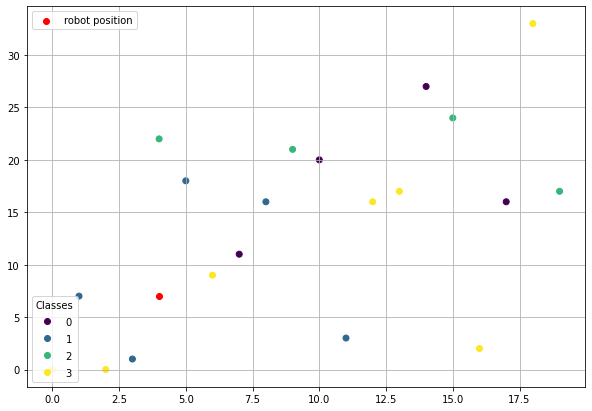

In [12]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [initial_position]
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k).fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        decision = np.random.binomial(1, .2)
        curpos = self.trajectory[-1]
        if decision != 1:
            direction = self.knn.predict(np.reshape(curpos, (-1, 2)))
            newpos = curpos + self.mapping[direction[0]]
        else:
            newpos = curpos + self.mapping[0]
        self.trajectory.append(newpos)

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [15]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.array(robot.trajectory)
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

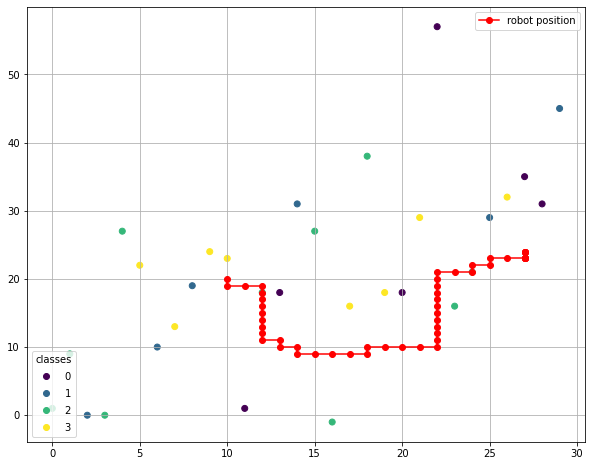

In [16]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

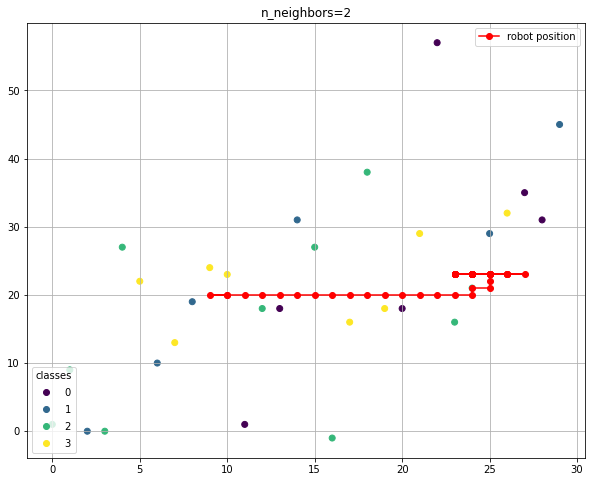

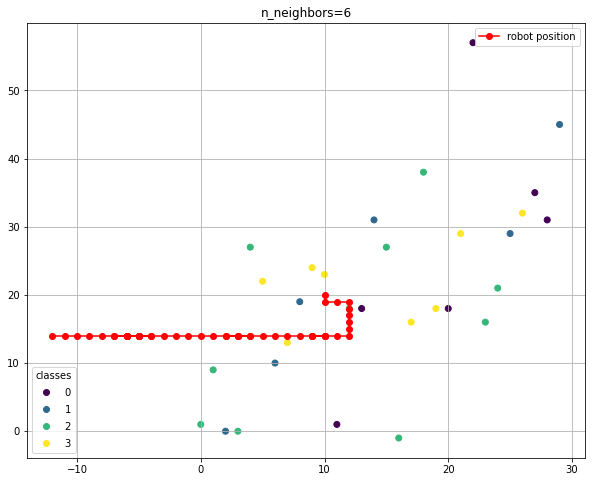

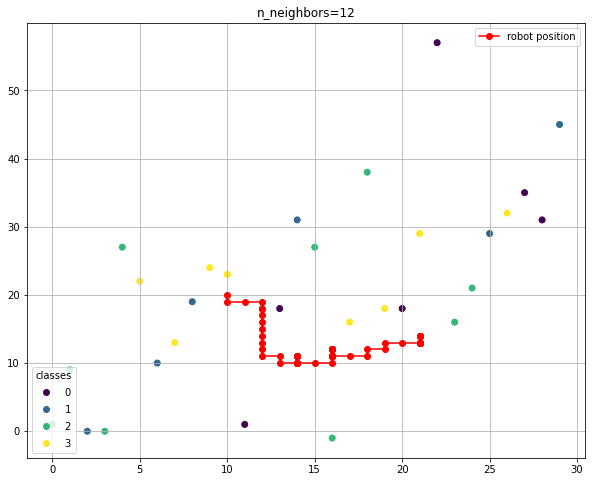

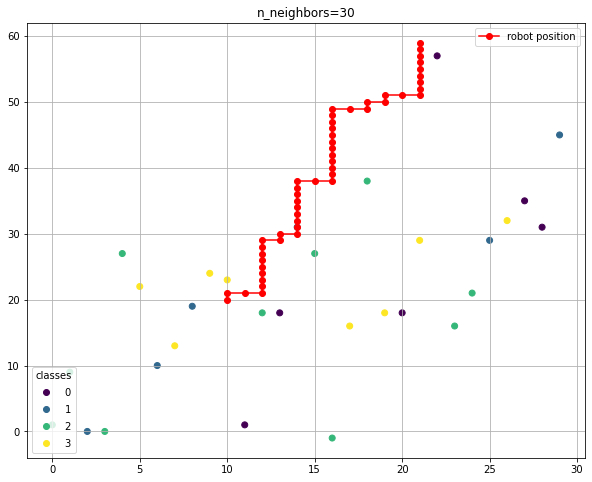

In [17]:
# fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10, 8))
params = [2, 6, 12, 30]
for k in params:
    conduct_experiment(x, mean = 3, std = 10, k = k, n_movements = 50)
    plt.title(f'n_neighbors={k}')
# В случае случайного размещения меток на плоскости, если классы назначаются метками осмысленно, то можно 
# было бы подобрать такое соотношение меток нужного класса, чтобы робот двигался по заранее заданной траектории
# при некотором k - числе меток для принятия решения.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [18]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [19]:
data.info()
# Пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [20]:
# Бессмысленный только первый столбец (по сути, он является индексом)
data.drop(columns=['Unnamed: 0'], inplace=True)

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [21]:
data.corr()
# Больше всего коррелирует с ценой: вес в каратах, и x, y, z

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [22]:
data = pd.get_dummies(data)

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [23]:
def scale_df(df, sc):
    df_real = df.loc[:, 'carat':'z']
    df_realscaled = pd.DataFrame(sc.transform(df_real), index=df_real.index,
                                 columns=df_real.columns)
    return pd.concat([df_realscaled, df.loc[:, 'cut_Fair':]], axis=1)
    

(53940, 27)


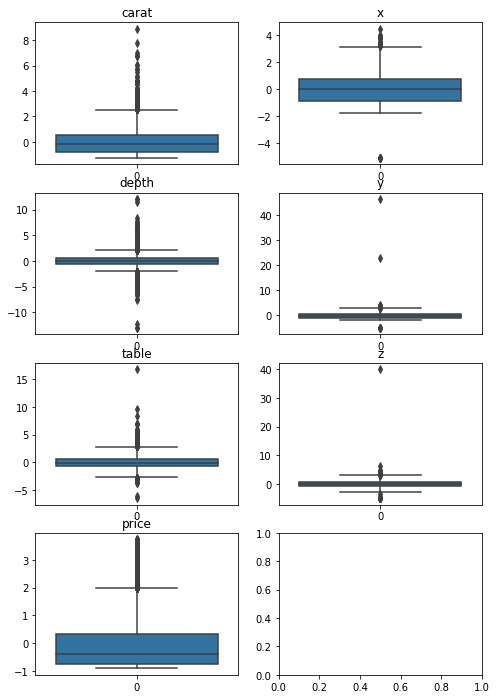

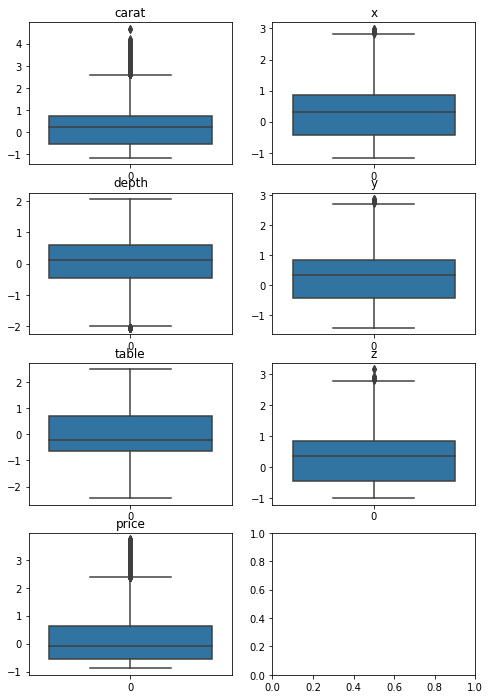

In [24]:
# Сначала найдем выбросы и удалим
print(data.shape)
data_real = data.loc[:, 'carat':'z']
d = stdsc.fit_transform(data_real)
bxplt_knn(d, data_real.columns)
# Очевидно, что выбросы есть по всем признакам - удалим их,
# и посмотрим, что изменилось
bxplt_knn(d[(d[:, 1] < 2.12) & (d[:, 1] > -2.12) & (d[:, 2] > -2.5) & (d[:, 2] < 2.5) & (d[:, 4] > -2) & (d[:, 4] < 3) & (d[:, 5] < 10) & (d[:, 5] > -4) & (d[:, 6] < 10) & (d[:, 6] > -1)], data_real.columns)
# data = data[(d[:, 1] < 2.12) & (d[:, 1] > -2.12) & (d[:, 2] > -2.5) & (d[:, 2] < 2.5) & (d[:, 4] > -2) & (d[:, 4] < 3) & (d[:, 5] < 10) & (d[:, 5] > -4) & (d[:, 6] < 10) & (d[:, 6] > -1)]

In [25]:
data.shape

(53940, 27)

In [26]:
X = data.drop(columns=['price'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [27]:
train_df = X_train.loc[:, 'carat':'z']

In [28]:
stdsc.fit(train_df)
X_train = scale_df(X_train, stdsc)
X_test = scale_df(X_test, stdsc)

In [29]:
X_test

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
5246,0.422673,-0.031877,0.242202,0.520799,0.558595,0.519045,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12373,-0.842996,0.736364,-1.094275,-0.922236,-0.904337,-0.817963,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
40394,-0.695334,0.736364,-0.648783,-0.690637,-0.724836,-0.606857,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
20235,1.688341,2.063327,0.242202,1.438284,1.384300,1.673094,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
45892,-0.589862,0.526844,-1.539768,-0.503577,-0.536360,-0.452045,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,-0.210161,-0.171558,-0.648783,-0.031473,0.011117,-0.029832,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
39020,-0.779712,-0.381078,0.242202,-0.806437,-0.769712,-0.803890,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
23784,1.920380,1.225246,-0.648783,1.643160,1.590726,1.757536,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
52080,-0.041406,0.387164,-1.094275,0.128864,0.154718,0.181274,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [30]:
from sklearn.metrics import mean_squared_error as MSE

In [31]:
from sklearn.linear_model import LinearRegression as lr
clf = lr()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print(f'Train: {MSE(y_train, y_pred)}')
print(f'Test: {MSE(y_test, clf.predict(X_test))}')

Train: 1295920.7310854401
Test: 1263039.4377476908


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [32]:
pd.DataFrame(np.abs(clf.coef_), index=X_train.columns, columns=['Вес'])
# Оценки коэффициентов по модулю на порядок превышают оценки прочих для
# признаков carat, x.

,Вес
carat,5363.933924
depth,99.198416
table,65.084859
x,1544.203392
y,417.869993
z,33.589652
cut_Fair,536.088803
cut_Good,17.560521
cut_Ideal,239.153551
cut_Premium,186.120073


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [33]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=10)
reg1 = linear_model.Lasso(alpha=10)
# Веса уменьшаются незначительно (для Лассо - сильнее)
# Проблема мультиколлениарности сильно проявлялась в изначальной регрессии (вес признака х был занулен).
# С регуляризацией удалось занулить часть признаков.
for r, l in zip([reg, reg1], ('L2', "Lasso")):
    r.fit(X_train, y_train)
    print(pd.DataFrame(np.abs(r.coef_), index=X_train.columns, columns=['Вес']))
    print(f'Sum of absolute weights {l} = {np.abs(r.coef_).sum()}')
    print(f'{l} regularization Train MSE {MSE(y_train, r.predict(X_train))}')
    print(f'{l} regularization Test MSE {MSE(y_test, r.predict(X_test))}')

                       Вес
carat          5325.828043
depth            98.418951
table            65.785292
x              1386.169655
y               298.120296
z                36.994899
cut_Fair        543.816630
cut_Good         14.891683
cut_Ideal       241.570361
cut_Premium     183.582936
cut_Very Good   133.555017
color_D         839.344031
color_E         618.846151
color_F         556.866082
color_G         338.240948
color_H         151.484319
color_I         636.705162
color_J        1565.107732
clarity_I1     3747.509848
clarity_IF     1550.301172
clarity_SI1     171.565420
clarity_SI2    1149.639881
clarity_VS1     742.867438
clarity_VS2     440.832330
clarity_VVS1   1197.324837
clarity_VVS2   1137.389371
Sum of absolute weights L2 = 23172.758485113955
L2 regularization Train MSE 1296135.6554706262
L2 regularization Test MSE 1247766.0816836224
                       Вес
carat          4893.912028
depth           111.591588
table            85.397456
x               732.20

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

,L2,Lasso
0.1,7622.966042,7811.962229
1.0,7612.301357,7666.448129
10.0,7513.833836,6726.743121
100.0,6828.423633,3709.392835
200.0,6288.952745,3500.029204


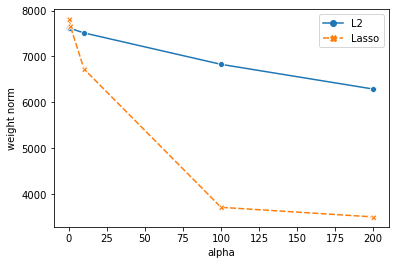

In [34]:
absciss = [0.1, 1, 10, 100, 200]
ordinate1 = []
ordinate2 = []
for a in absciss:
    reg = linear_model.Ridge(alpha=a)
    reg1 = linear_model.Lasso(alpha=a, max_iter=2104)
    reg.fit(X_train, y_train)
    reg1.fit(X_train, y_train)
    ordinate1.append(np.linalg.norm(reg.coef_))
    ordinate2.append(np.linalg.norm(reg1.coef_))
df = pd.DataFrame({"L2": ordinate1, "Lasso": ordinate2}, index=absciss)
fig = sns.lineplot(data=df, markers=True)
fig.set(xlabel='alpha', ylabel='weight norm')
df
# Метод Lasso агрессивнее уменьшает веса

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [35]:
absciss = [0.1, 0.5, 1, 1.5, 2, 5, 10, 50, 100, 150, 200]
ls = linear_model.LassoCV(alphas=absciss, cv=5, max_iter=3000)
ls.fit(X_train, y_train)
opt_a = ls.alphas_[np.argmin(np.mean(ls.mse_path_, axis=1))]
pd.DataFrame(np.mean(ls.mse_path_, axis=1), index=ls.alphas_, columns=['MSE'])
# Наибольшее качество дает значение альфа равное 1

,MSE
200.0,2.483612e+06
150.0,2.423616e+06
100.0,2.256796e+06
50.0,1.916485e+06
10.0,1.337098e+06
5.0,1.309235e+06
2.0,1.301382e+06
1.5,1.300732e+06
1.0,1.300322e+06
0.5,1.300857e+06


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [36]:
ls = linear_model.Lasso(alpha=opt_a)
ls.fit(X_train, y_train)
ls.coef_

array([ 5328.20877235,  -103.87966504,   -68.32721086, -1103.3007541 ,
           0.        ,   -26.592664  ,  -664.72661474,  -140.05070345,
          99.19144652,    29.19583542,     0.        ,   489.90544819,
         272.16291197,   211.69494649,     0.        ,  -485.86747002,
        -966.92961218, -1891.91332614, -4293.50653725,   998.18016757,
        -701.04702794, -1678.49316648,   203.21859905,   -87.57346284,
         652.17502931,   596.73574469])

In [37]:
X_test.columns[ls.coef_ == 0]
# Неинформативными оказались признаки:

Index(['y', 'cut_Very Good', 'color_G'], dtype='object')

In [38]:
X_test.columns[np.abs(ls.coef_) > 4000]
# Наиболее информативные признаки:

Index(['carat', 'clarity_I1'], dtype='object')

In [39]:
# Признаки 'y', 'cut_Very Good', 'color_G' могли оказаться неинформативными, так как 'y' имеет большую корреляцию
# с признаками carat и x, вероятно так как алмазы в основном имеют в горизонтальном сечении очень схожие размеры
# как в длину, так и в ширину, поэтому если алмаз имеет длинное сечение, то скорее всего у него относительных
# размеров ширина. 'cut_Very Good' неинформативен скорее всего из-за небольшого отличия в цене между соседними по
# признаку значениями (то есть алмаз с признаком 'cut_Good' не сильно дешевле, или алмаз с признаком 'cut_Premiuim'
# не намного дороже). Полагаю, что с признаком цвета примерно та же история, цена не сильно отличается у алмаза
# с цветом G от H или F.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [40]:
y_pred = ls.predict(X_test)
MSE(y_test, y_pred)

1231873.142930378